> Here we will explore the training data and attempt to find preliminary correlations between the anonymized features and whether of not the customer defaulted on their payments.

# Inspect data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> The csv file is very large so will have to be dealt with in chunks

## chunk and inspect DataFrame

In [2]:
chunksize = 10000

train_df_iter = pd.read_csv('train_data.csv', chunksize=chunksize)

In [3]:
train_df_example = train_df_iter.__next__()

In [4]:
train_df_example.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [5]:
train_df_example.tail()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
9995,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-02-26,0.331150,1.472028,0.049780,0.187973,0.000417,0.143625,0.955153,0.099672,...,NaN,NaN,NaN,0.008082,0.002661,0.003676,NaN,0.001279,0.001011,0.008815
9996,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-03-19,0.361060,2.065567,0.048313,0.194930,0.006775,0.144908,1.252287,0.118775,...,NaN,NaN,NaN,0.007419,0.007829,0.000511,NaN,0.008342,0.004060,0.005083
9997,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-03-28,0.708199,0.357349,0.013953,1.002573,0.003448,0.110258,0.170252,0.040633,...,NaN,NaN,NaN,0.009987,0.007548,0.003425,NaN,0.005115,0.007862,0.008078
9998,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-04-15,0.692401,0.009380,0.018337,0.588057,0.001596,0.108820,0.177197,0.031383,...,NaN,NaN,NaN,0.002379,0.006379,0.009408,NaN,0.005702,0.006532,0.003437
9999,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-05-31,0.779090,0.445052,0.032713,0.171864,0.001149,0.099150,0.009573,0.083275,...,NaN,NaN,NaN,0.001991,0.000735,0.009753,NaN,0.003173,0.007842,0.005381


In [6]:
train_df_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 14.5+ MB


## convert S_2 to datetime

In [7]:
train_df_example['S_2']

0       2017-03-09
1       2017-04-07
2       2017-05-28
3       2017-06-13
4       2017-07-16
           ...    
9995    2018-02-26
9996    2018-03-19
9997    2017-03-28
9998    2017-04-15
9999    2017-05-31
Name: S_2, Length: 10000, dtype: object

In [8]:
train_df_example.loc[:, 'S_2'] = pd.to_datetime(train_df_example['S_2'])

## inspect columns

In [9]:
train_df_example.columns.values

array(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3',
       'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2',
       'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50',
       'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11',
       'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13',
       'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15',
       'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18',
       'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21',
       'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73',
       'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25',
       'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10',
       'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13',
       'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18',
       'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19',
   

In [10]:
columns = train_df_example.columns

> lets split them into different categories and inspect the groups one by one

In [11]:
b_columns = list(filter(lambda x: x.startswith("B_"), columns))

In [12]:
r_columns = list(filter(lambda x: x.startswith("R_"), columns))

In [13]:
p_columns = list(filter(lambda x: x.startswith("P_"), columns))

In [14]:
d_columns = list(filter(lambda x: x.startswith("D_"), columns))

In [15]:
s_columns = list(filter(lambda x: x.startswith("S_"), columns))

In [16]:
train_df_example[b_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B_1     10000 non-null  float64
 1   B_2     10000 non-null  float64
 2   B_3     10000 non-null  float64
 3   B_4     10000 non-null  float64
 4   B_5     10000 non-null  float64
 5   B_6     10000 non-null  float64
 6   B_7     10000 non-null  float64
 7   B_8     9959 non-null   float64
 8   B_9     10000 non-null  float64
 9   B_10    10000 non-null  float64
 10  B_11    10000 non-null  float64
 11  B_12    10000 non-null  float64
 12  B_13    9916 non-null   float64
 13  B_14    10000 non-null  float64
 14  B_15    9987 non-null   float64
 15  B_16    10000 non-null  float64
 16  B_17    4554 non-null   float64
 17  B_18    10000 non-null  float64
 18  B_19    10000 non-null  float64
 19  B_20    10000 non-null  float64
 20  B_21    10000 non-null  float64
 21  B_22    10000 non-null  float64
 22 

In [17]:
train_df_example[r_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_1     10000 non-null  float64
 1   R_2     10000 non-null  float64
 2   R_3     10000 non-null  float64
 3   R_4     10000 non-null  float64
 4   R_5     10000 non-null  float64
 5   R_6     10000 non-null  float64
 6   R_7     10000 non-null  float64
 7   R_8     10000 non-null  float64
 8   R_9     644 non-null    float64
 9   R_10    10000 non-null  float64
 10  R_11    10000 non-null  float64
 11  R_12    10000 non-null  float64
 12  R_13    10000 non-null  float64
 13  R_14    10000 non-null  float64
 14  R_15    10000 non-null  float64
 15  R_16    10000 non-null  float64
 16  R_17    10000 non-null  float64
 17  R_18    10000 non-null  float64
 18  R_19    10000 non-null  float64
 19  R_20    9999 non-null   float64
 20  R_21    10000 non-null  float64
 21  R_22    10000 non-null  float64
 22 

In [18]:
train_df_example[p_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P_2     9936 non-null   float64
 1   P_3     9488 non-null   float64
 2   P_4     10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [19]:
train_df_example[d_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D_39    10000 non-null  float64
 1   D_41    10000 non-null  float64
 2   D_42    1355 non-null   float64
 3   D_43    6913 non-null   float64
 4   D_44    9505 non-null   float64
 5   D_45    10000 non-null  float64
 6   D_46    7709 non-null   float64
 7   D_47    10000 non-null  float64
 8   D_48    8697 non-null   float64
 9   D_49    1104 non-null   float64
 10  D_50    4707 non-null   float64
 11  D_51    10000 non-null  float64
 12  D_52    9961 non-null   float64
 13  D_53    2733 non-null   float64
 14  D_54    10000 non-null  float64
 15  D_55    9703 non-null   float64
 16  D_56    4836 non-null   float64
 17  D_58    10000 non-null  float64
 18  D_59    9829 non-null   float64
 19  D_60    10000 non-null  float64
 20  D_61    8886 non-null   float64
 21  D_62    8574 non-null   float64
 22 

In [20]:
train_df_example[s_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   S_2     10000 non-null  datetime64[ns]
 1   S_3     8248 non-null   float64       
 2   S_5     10000 non-null  float64       
 3   S_6     10000 non-null  float64       
 4   S_7     8248 non-null   float64       
 5   S_8     10000 non-null  float64       
 6   S_9     4706 non-null   float64       
 7   S_11    10000 non-null  float64       
 8   S_12    10000 non-null  float64       
 9   S_13    10000 non-null  float64       
 10  S_15    10000 non-null  float64       
 11  S_16    10000 non-null  float64       
 12  S_17    10000 non-null  float64       
 13  S_18    10000 non-null  float64       
 14  S_19    10000 non-null  float64       
 15  S_20    10000 non-null  float64       
 16  S_22    9966 non-null   float64       
 17  S_23    9999 non-null   float64       
 18  S_24   

## load and inspect target

In [21]:
train_labels = pd.read_csv('train_labels.csv')

In [22]:
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [23]:
train_labels.tail()

,customer_ID,target
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1
458912,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0


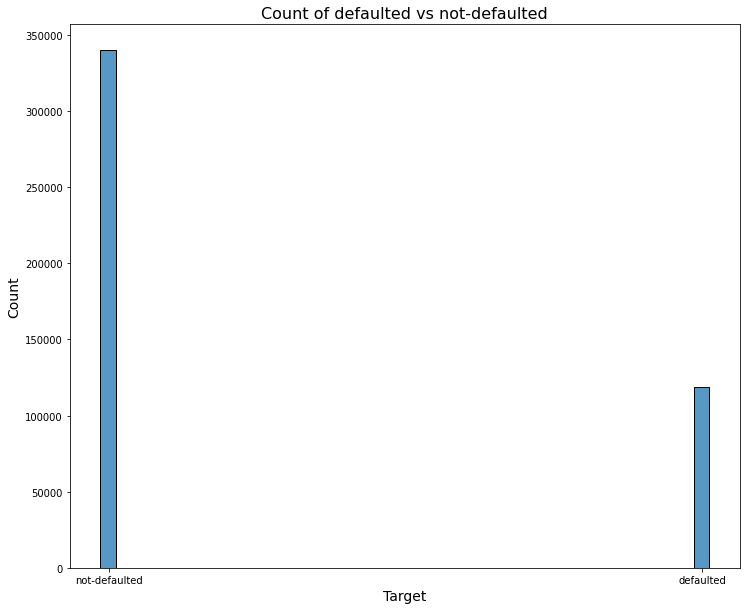

In [24]:
plt.figure(figsize=(12, 10))
sns.histplot(train_labels['target'])
plt.title('Count of defaulted vs not-defaulted',
         fontsize=16)
plt.xticks([0.014, 0.989], ['not-defaulted', 'defaulted'])
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14);

In [25]:
train_labels['customer_ID'].nunique() == len(train_labels)

True

# use PCA to reduce the dimensions of the dataset

## replace NA values with 0

In [26]:
train_df_example.fillna(0, inplace=True)

## get average values of each customer

In [27]:
mean_values_df = train_df_example.groupby('customer_ID').mean()

In [28]:
mean_values_df.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.0,0.000000,...,0.0,0.0,0.0,0.003664,0.005343,0.005178,0.0,0.005066,0.005283,0.005814
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.0,0.077846,...,0.0,0.0,0.0,0.004906,0.006271,0.006007,0.0,0.004824,0.004218,0.004902
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.0,0.000000,...,0.0,0.0,0.0,0.006006,0.004675,0.003607,0.0,0.004288,0.005113,0.004500
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.0,0.061026,...,0.0,0.0,0.0,0.005775,0.005777,0.004181,0.0,0.006742,0.004768,0.005236
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.0,0.048778,...,0.0,0.0,0.0,0.003853,0.004818,0.004818,0.0,0.004852,0.004380,0.004219


## use PCA to get features

In [29]:
X = mean_values_df.reset_index()

In [30]:
X.drop(columns='customer_ID', inplace=True)

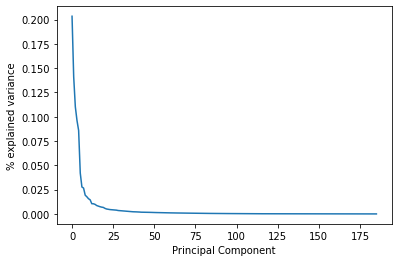

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('% explained variance');

> using the elbow method, we can make an initial guess of 6 relevant features for our model

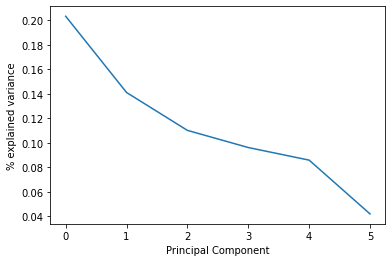

In [32]:
pca_2 = PCA(n_components=6)
pca_2.fit(X)
plt.plot(pca_2.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('% explained variance');

## merge customer_ID and target

In [33]:
X_proj = pd.DataFrame(pca_2.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4',
                                                                 'PC5', 'PC6'])

In [34]:
X_proj.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.706583,-0.364278,-0.497256,0.080536,-0.031309,0.544620
1,1.454561,-1.996146,-2.639184,1.081337,0.535499,-0.164632
2,1.289533,-2.799796,-2.556961,0.925319,0.764693,-0.608276
3,-1.643852,-0.775092,1.832381,-1.043538,-0.357795,0.181583
4,-2.588868,-0.561059,-0.436470,0.002557,0.122024,-0.228821


In [35]:
mean_values_df.reset_index(inplace=True)

In [36]:
mean_values_df.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.0,...,0.0,0.0,0.0,0.003664,0.005343,0.005178,0.0,0.005066,0.005283,0.005814
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.0,...,0.0,0.0,0.0,0.004906,0.006271,0.006007,0.0,0.004824,0.004218,0.004902
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.0,...,0.0,0.0,0.0,0.006006,0.004675,0.003607,0.0,0.004288,0.005113,0.004500
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.0,...,0.0,0.0,0.0,0.005775,0.005777,0.004181,0.0,0.006742,0.004768,0.005236
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.0,...,0.0,0.0,0.0,0.003853,0.004818,0.004818,0.0,0.004852,0.004380,0.004219


In [37]:
intermediate_merge = X_proj.merge(mean_values_df['customer_ID'], right_index=True, left_index=True)

In [38]:
df = intermediate_merge.merge(train_labels, left_on='customer_ID', right_on='customer_ID')

## visualize relationship between target and new features

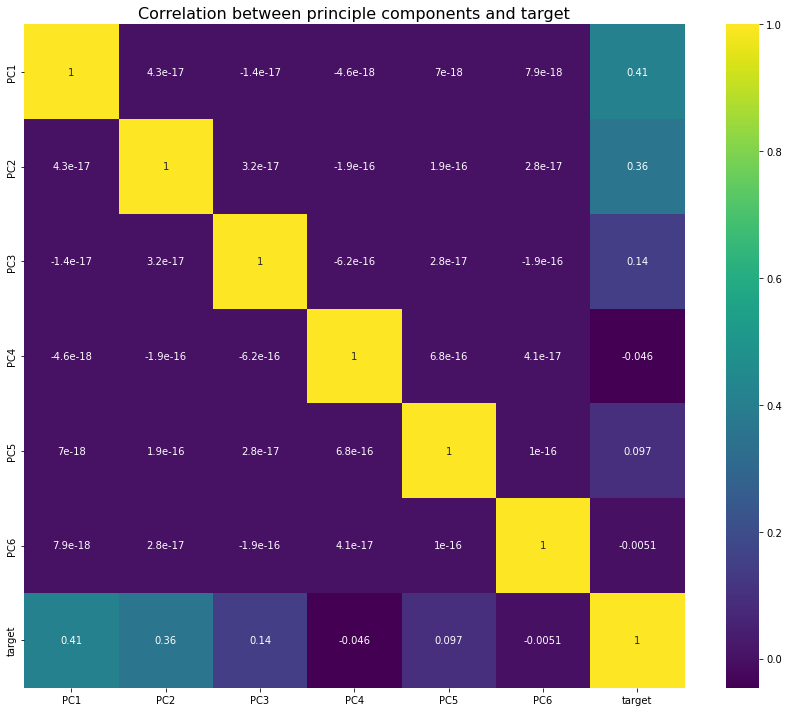

In [39]:
corr = df.drop(columns='customer_ID').corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation between principle components and target",
         fontsize=16)
plt.tight_layout();

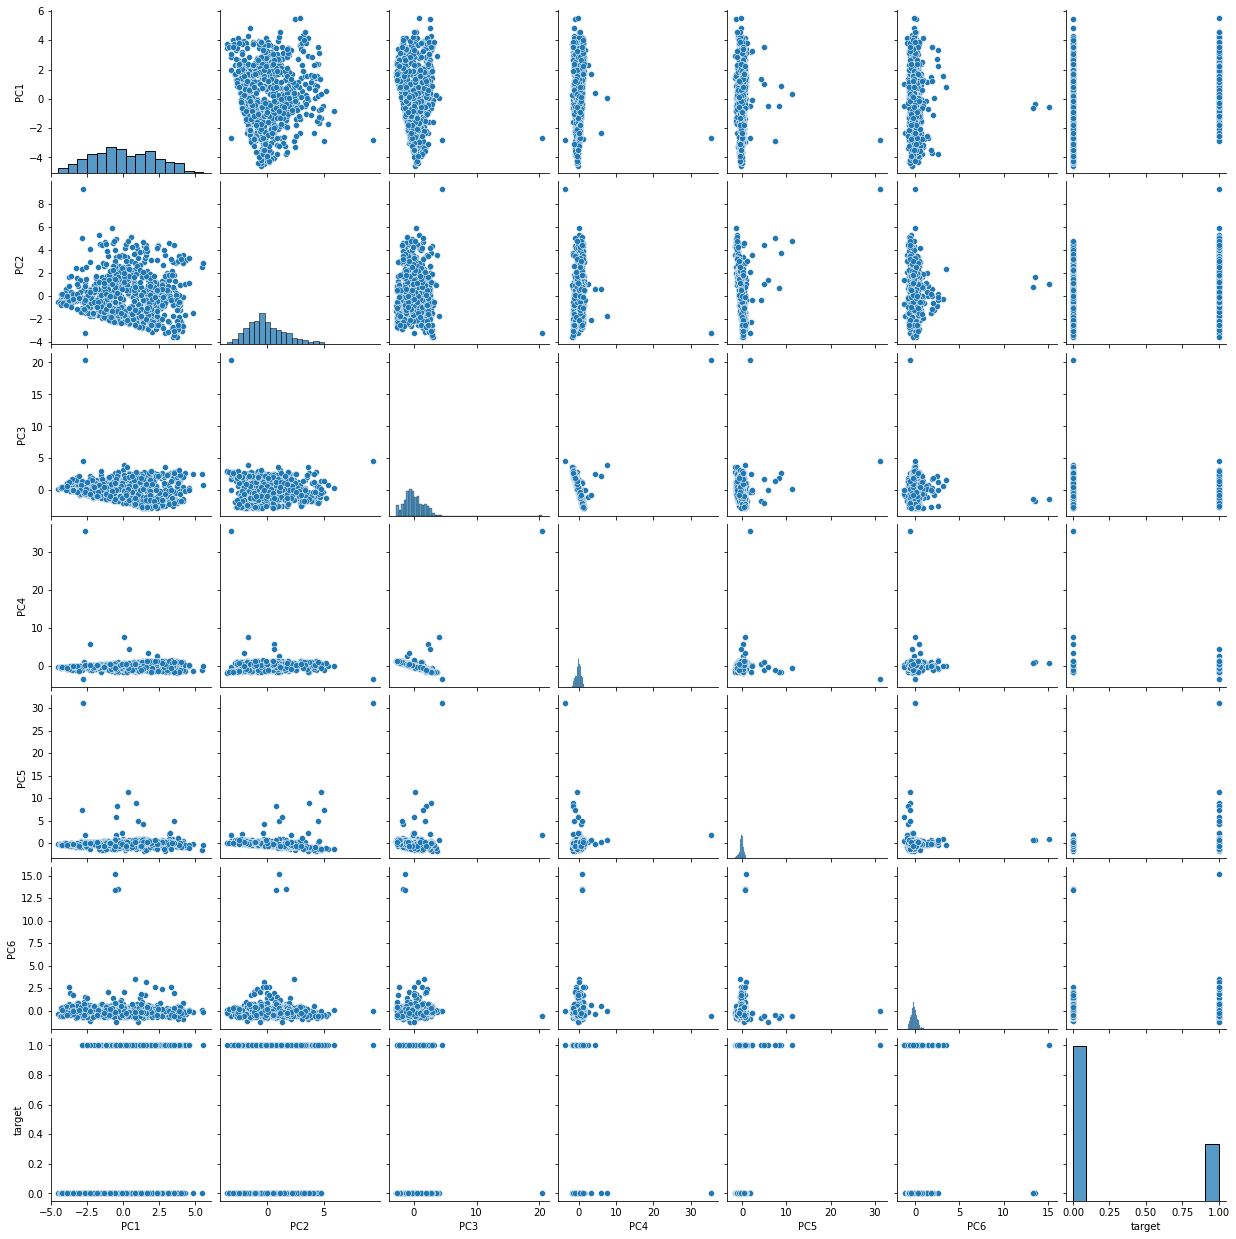

In [40]:
sns.pairplot(data = df.drop(columns='customer_ID'));

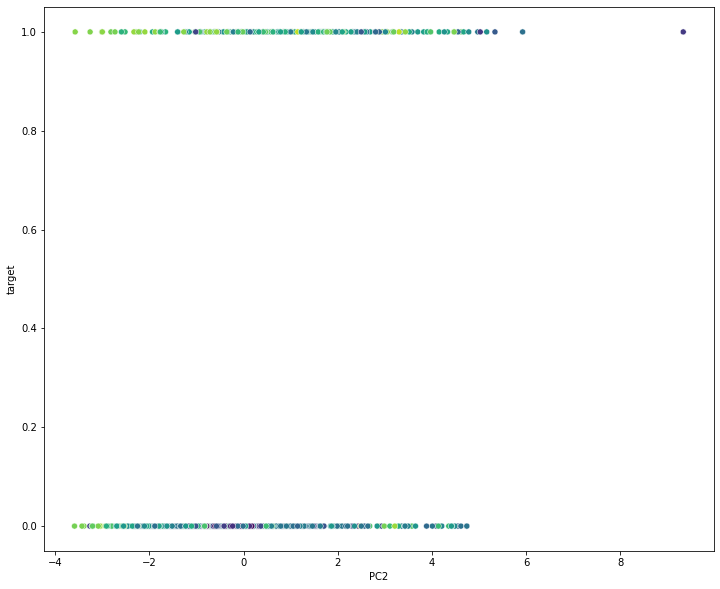

In [41]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['PC2'], y=df['target'], c=df['PC1']);

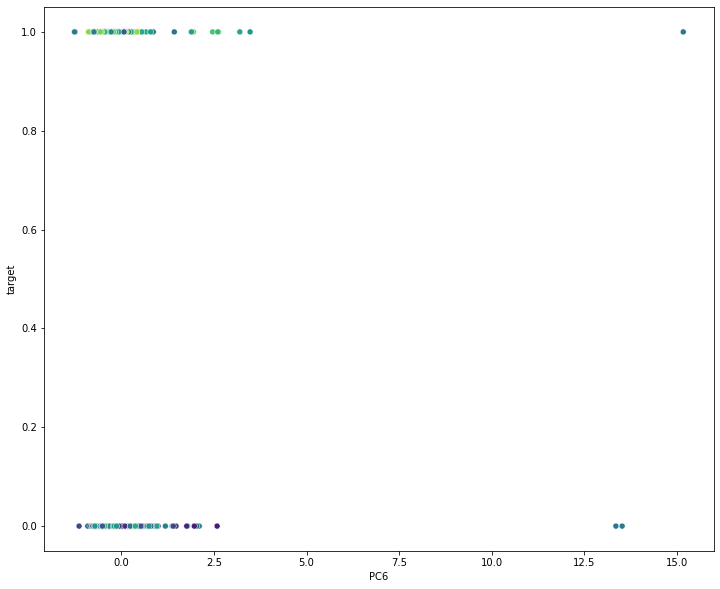

In [42]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['PC6'], y=df['target'], c=df['PC1']);

# function to collect all training data

In [50]:
with open(filename) as f:
    print(sum(1 for line in f))

5531452


In [73]:
5531452 / 150000

36.87634666666667

In [81]:
def transform_data(pca):
    chunksize = 150000
    train_df_iter = pd.read_csv('train_data.csv', chunksize=chunksize)
    df = pd.DataFrame()
    c = 0
    while c < 36:
        train_df_example = train_df_iter.__next__()
        train_df_example.loc[:, 'S_2'] = pd.to_datetime(train_df_example['S_2'])
        train_labels = pd.read_csv('train_labels.csv')
        train_df_example.fillna(0, inplace=True)
        mean_values_df = train_df_example.groupby('customer_ID').mean()
        X = mean_values_df.reset_index()
        X.drop(columns='customer_ID', inplace=True)
        X_proj = pd.DataFrame(pca.transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4',
                                                                 'PC5', 'PC6'])
        mean_values_df.reset_index(inplace=True)
        intermediate_merge = X_proj.merge(mean_values_df['customer_ID'], right_index=True, left_index=True)
        df = df.append(intermediate_merge.merge(train_labels, left_on='customer_ID', right_on='customer_ID'))
        c += 1
    return df


combined_df = transform_data(pca_2)
    

In [82]:
combined_df.reset_index().drop(columns='index', inplace=True)

In [83]:
combined_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,customer_ID,target
0,-2.706583,-0.364278,-0.497256,0.080536,-0.031309,0.544621,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,1.454561,-1.996146,-2.639184,1.081337,0.535499,-0.164633,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,1.289533,-2.799796,-2.556961,0.925319,0.764693,-0.608277,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,-1.643852,-0.775092,1.832381,-1.043538,-0.357795,0.181581,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,-2.588868,-0.561059,-0.436470,0.002557,0.122024,-0.228821,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [84]:
combined_df.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,customer_ID,target
12436,-0.580309,0.186826,0.909477,-0.523466,-0.501541,-0.257636,f9e2326309137f076b35d36c363d2f61405cc7fcdb9627...,0
12437,3.163424,-2.552809,1.402273,-0.922683,0.107135,0.089302,f9e27064427cbcea8d2df7875ee1badecb1e8da42afcd3...,0
12438,-0.444852,-0.713683,0.492959,-0.384141,0.044044,-0.370855,f9e278e592a8080bb5091314081c844b813da4fb38675a...,0
12439,0.201553,2.722306,-0.298936,0.476343,-0.540456,-0.397010,f9e2851f8f71c00caea42ed75a3e8d0e8bf5ec964f8287...,0
12440,-2.810483,-0.292963,0.912360,-0.640883,-0.343012,-0.019231,f9e28ef6d74c7e08adb6fc2550c0d8cd90be42943c5760...,0


In [85]:
combined_df['customer_ID'].value_counts() 

375f4f5b68aedb2cc742c921b1a7f3bc383a82d34ccc96c1e55c5f260c5e23a7    2
3e3beb757cd9b08d37f3573c3882e8953e7302bacab3a2ab19cd0594443044ac    2
f2d20be4a44818507befd679942c363aaa41cc3fb326de6d7fb3b603bf06cd5c    2
07027fd46e6e2bb9604f4d1d5d2d59a791fecf12ac0b9fa4f792c6bea3958ee6    2
60ff5197b3dced3e6d08335849599bf3a97bb777407f7c3cd29ccb285d37a13a    2
                                                                   ..
53194ed32efc1837d3497e21a7867e8150afb8e38ebe9e299386ceabc2948eb4    1
531940052f689cc98783dab929487c4e99deb8e57ef65189c841fce2220eac34    1
53193bec3ba1762d3f79ca6aa578d81633e6709e31511ff7eea3db3f7161e53b    1
5319206f34d674bbcbce553be39d7731ef182b51266a8bbced821cbbe9084e38    1
f9e28ef6d74c7e08adb6fc2550c0d8cd90be42943c5760e634cedc1184c7cf1a    1
Name: customer_ID, Length: 448011, dtype: int64

In [86]:
sum(combined_df['customer_ID'].value_counts() == 2)

33